# Amazon Fine Food Reviews

Based on Amazon customer reviews, analysis of the sentiment score obtained from dataset and comparing them with star ratings

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SAYANTANI
[nltk_data]     DEY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#Read data
df = pd.read_csv('Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.shape

(568454, 10)

In [6]:
removecols = ['ProfileName','ProductId','UserId']
df.drop(removecols, axis = 1, inplace=True)

In [7]:
df

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...
568449,568450,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


# **EDA**

Exploratoray Data Analysis

In [8]:
score = df['Score'].value_counts()  #total ratings

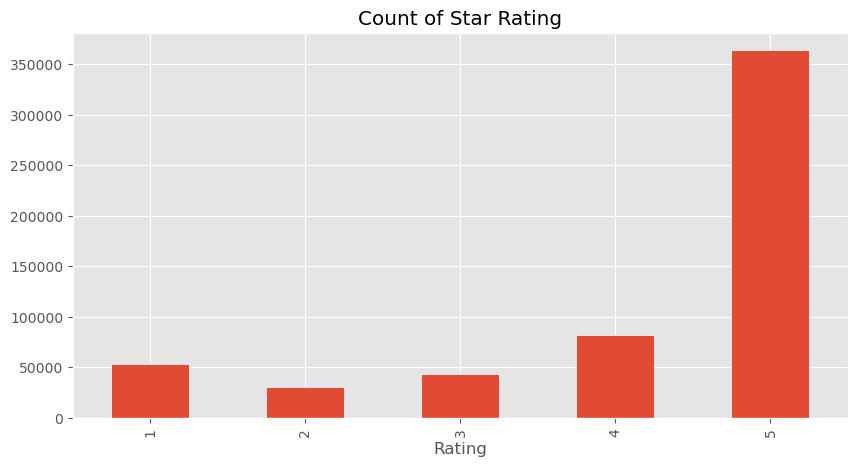

In [9]:
#barplot representation
axis = score.sort_index().plot(kind = 'bar', 
                               title = 'Count of Star Rating',
                              figsize= (10,5))
axis.set_xlabel('Rating')
plt.show()

In [10]:
#basic nltk

example = df['Text'][102]
print(example)

The crust on these tarts are perfect.  My husband loves these, but I'm not so crazy about them.  They are just too sour/tart for my taste.  I'll eat the crust and hubby takes my filling.  My kids think they're great, so maybe it's just me.


In [11]:
tokens= nltk.word_tokenize(example)
tokens[:20]

['The',
 'crust',
 'on',
 'these',
 'tarts',
 'are',
 'perfect',
 '.',
 'My',
 'husband',
 'loves',
 'these',
 ',',
 'but',
 'I',
 "'m",
 'not',
 'so',
 'crazy',
 'about']

In [12]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SAYANTANI DEY\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
tagged = nltk.pos_tag(tokens)
tagged[:20]

[('The', 'DT'),
 ('crust', 'NN'),
 ('on', 'IN'),
 ('these', 'DT'),
 ('tarts', 'NNS'),
 ('are', 'VBP'),
 ('perfect', 'JJ'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('husband', 'NN'),
 ('loves', 'VBZ'),
 ('these', 'DT'),
 (',', ','),
 ('but', 'CC'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('not', 'RB'),
 ('so', 'RB'),
 ('crazy', 'JJ'),
 ('about', 'IN')]

In [14]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\SAYANTANI DEY\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\SAYANTANI
[nltk_data]     DEY\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [15]:
group = nltk.chunk.ne_chunk(tagged) #chunks the text
group.pprint()

(S
  The/DT
  crust/NN
  on/IN
  these/DT
  tarts/NNS
  are/VBP
  perfect/JJ
  ./.
  My/PRP$
  husband/NN
  loves/VBZ
  these/DT
  ,/,
  but/CC
  I/PRP
  'm/VBP
  not/RB
  so/RB
  crazy/JJ
  about/IN
  them/PRP
  ./.
  They/PRP
  are/VBP
  just/RB
  too/RB
  sour/tart/JJ
  for/IN
  my/PRP$
  taste/NN
  ./.
  I/PRP
  'll/MD
  eat/VB
  the/DT
  crust/NN
  and/CC
  hubby/NN
  takes/VBZ
  my/PRP$
  filling/NN
  ./.
  My/PRP$
  kids/NNS
  think/VBP
  they/PRP
  're/VBP
  great/JJ
  ,/,
  so/RB
  maybe/RB
  it/PRP
  's/VBZ
  just/RB
  me/PRP
  ./.)


# **VADER SENTIMENT SCORE ANALYSIS**
This approach takes all the words in sentence and returns the positve/negative/neutral value, combines up to give the sentiment of the statement and removes stop words like 'and','the','a', etc as they don't include any sentiment.

NOTE: The sentiment relating to any relationship between objects can differ as nltk is not equivalent to human speech.

In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\SAYANTANI
[nltk_data]     DEY\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [18]:
sia.polarity_scores('I am living positive life.')

{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.5574}

In [19]:
sia.polarity_scores('Life was sad earlier.')

{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

In [20]:
sia.polarity_scores(example)  #from above chosen review#

{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.9287}

In [21]:
#Run the polarity score on the entire dataset
res={} #to store the score
for i,row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [22]:
res #checking the result

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [25]:
#storing this result in pandas dataframe for better view
vaders = pd.DataFrame(res).T # the '.T' flips the dataframe horizontally 
vaders = vaders.reset_index().rename(columns= {'index':'Id'}) # renaming the index
vaders = vaders.merge(df, how='left') # merging the obtained data with the original

In [26]:
vaders.head() #sentiment meta data

,Id,neg,neu,pos,compound,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


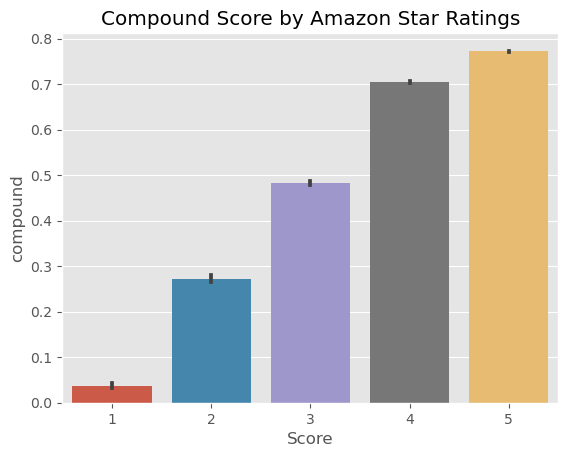

In [27]:
#Let's check if the ratings and sentiment scores match
#using bar plot
ax = sns.barplot(data= vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Ratings')
plt.show()

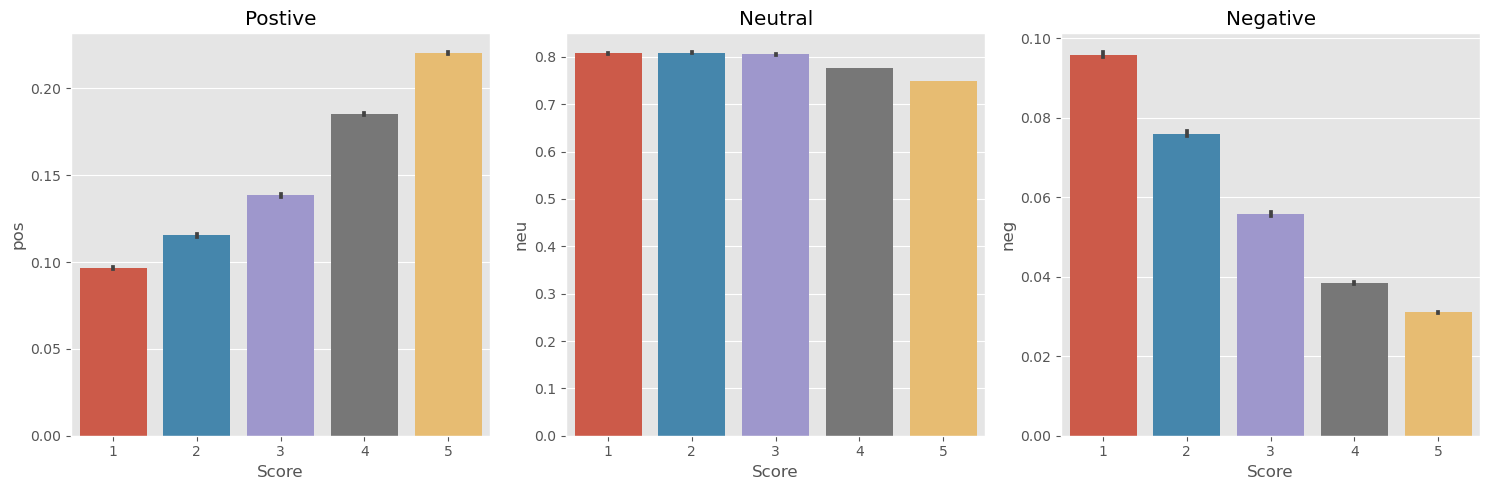

In [28]:
#To check the sentiment types for each star rating
#using matplotlib for subplots
fig, axs = plt.subplots(1,3,figsize= (15,5))
#defining the plots
sns.barplot(data=vaders, x='Score',y='pos', ax = axs[0])
sns.barplot(data=vaders, x='Score',y='neu', ax = axs[1])
sns.barplot(data=vaders, x='Score',y='neg', ax = axs[2])
axs[0].set_title('Postive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

As we hypothesized, the highest star rating (5) received the most positive scores, while the lowest star rating (1) received the most negative scores. This is evident in the plots, which show that the positive score increases from star rating 1 to 5, with star rating 5 having the highest positive score. Similarly, the negative score decreases from star rating 1 to 5, with star rating 5 having the lowest negative score.

# **With TextBlob**

In [29]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [30]:
from textblob import TextBlob

In [31]:
blob={} #to store the score
for i,row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    check_blob = TextBlob(text)
    blob[myid] = check_blob.sentiment.polarity

  0%|          | 0/568454 [00:00<?, ?it/s]

In [32]:
blob

{1: 0.45,
 2: -0.033333333333333326,
 3: 0.1335714285714286,
 4: 0.16666666666666666,
 5: 0.48333333333333334,
 6: 0.25740740740740736,
 7: 0.25083333333333335,
 8: 0.48600000000000004,
 9: 0.42857142857142855,
 10: 0.44999999999999996,
 11: 0.20859375,
 12: 0.012500000000000002,
 13: 0.12992424242424241,
 14: 0.64,
 15: -0.5,
 16: 0.225,
 17: 0.50625,
 18: 0.4125,
 19: 0.1284722222222222,
 20: 0.24,
 21: 0.4,
 22: 0.11666666666666665,
 23: 0.125,
 24: 0.25,
 25: 0.3214285714285714,
 26: 0.0,
 27: 0.0,
 28: 0.14583333333333331,
 29: 0.38636363636363635,
 30: 0.20859375,
 31: 0.2557692307692308,
 32: 0.6,
 33: 0.2205,
 34: 0.3661538461538462,
 35: 0.29333333333333333,
 36: 0.2261904761904762,
 37: 0.19791666666666669,
 38: 0.045138888888888895,
 39: 0.159375,
 40: 0.2,
 41: 0.23194444444444443,
 42: 0.0674769071508202,
 43: 0.6875,
 44: 0.63,
 45: 0.4666666666666666,
 46: 0.1708333333333333,
 47: 0.475,
 48: 0.7,
 49: 0.3547619047619048,
 50: 0.05,
 51: -0.12499999999999999,
 52: 0.3625

In [33]:
# Create a DataFrame from the TextBlob scores
textblob_df = pd.DataFrame(list(blob.items()), columns=['Id', 'blob'])

# Merge the TextBlob DataFrame with the existing DataFrame
merged_df = vaders.merge(textblob_df, on='Id', how='left')

In [34]:
merged_df.head()

,Id,neg,neu,pos,compound,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,blob
0,1,0.000,0.695,0.305,0.9441,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.450000
1,2,0.138,0.862,0.000,-0.5664,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.033333
2,3,0.091,0.754,0.155,0.8265,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.133571
3,4,0.000,1.000,0.000,0.0000,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.166667
4,5,0.000,0.552,0.448,0.9468,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.483333


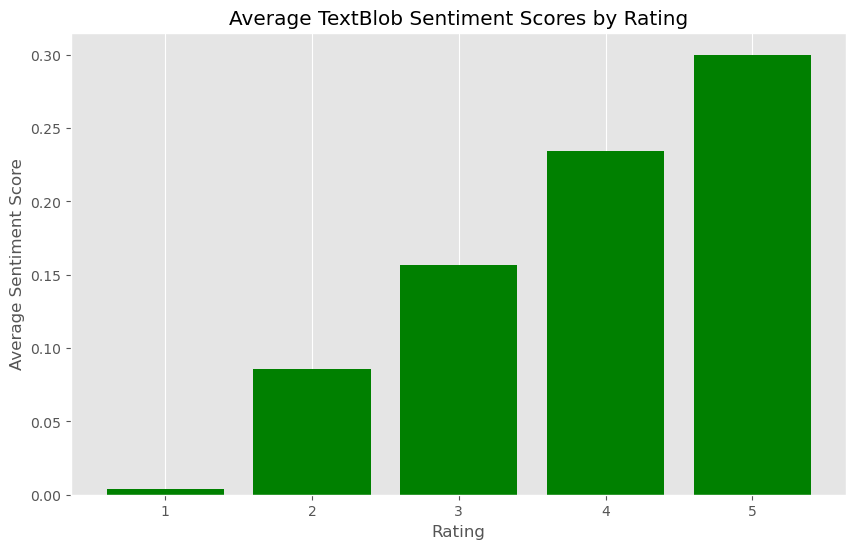

In [35]:
# Calculate the average TextBlob sentiment score for each rating value
average_blob_scores = merged_df.groupby('Score')['blob'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_blob_scores['Score'], average_blob_scores['blob'], color='green')
plt.title('Average TextBlob Sentiment Scores by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Score')
plt.grid(axis='y')
plt.show()


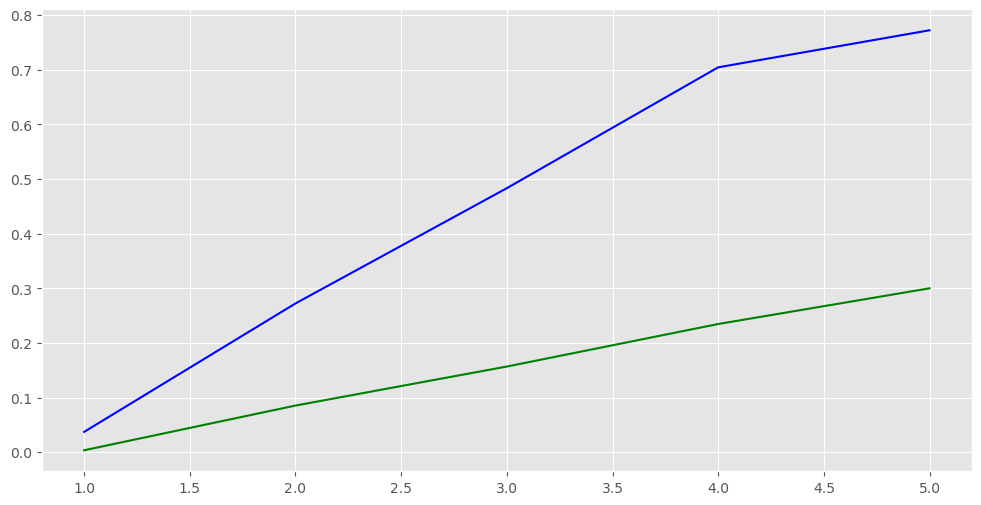

In [38]:
plt.rcParams['agg.path.chunksize'] = 20000  # Increase the chunksize as needed
# Assuming you have a DataFrame 'merged_df' with 'Score,' 'compound,' and 'blob' columns
downsampled_df = merged_df.groupby('Score').mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(downsampled_df['Score'], downsampled_df['compound'], label='VADER', color='blue')
plt.plot(downsampled_df['Score'], downsampled_df['blob'], label='TextBlob', color='green')


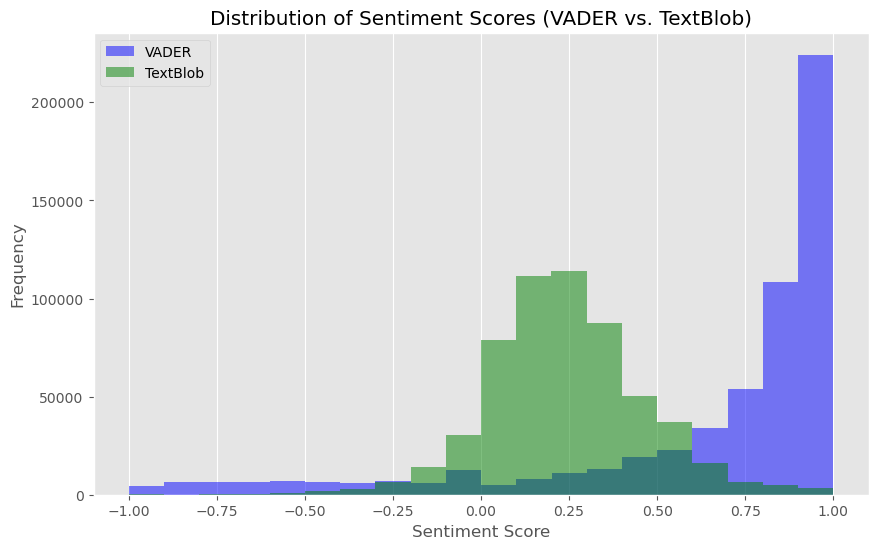

In [39]:
# Create histograms for VADER and TextBlob scores
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(merged_df['compound'], bins=20, alpha=0.5, color='blue', label='VADER')
plt.hist(merged_df['blob'], bins=20, alpha=0.5, color='green', label='TextBlob')
plt.title('Distribution of Sentiment Scores (VADER vs. TextBlob)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()


In [40]:
pip install flair

Note: you may need to restart the kernel to use updated packages.


In [41]:
from flair.models import TextClassifier
from flair.data import Sentence

# Load the pre-trained sentiment analysis model
sentiment_model = TextClassifier.load('en-sentiment')

In [42]:
# Create a dictionary to store sentiment scores
flair_scores = {}

# Iterate through the DataFrame with tqdm
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']

    # Create a Flair Sentence object
    sentence = Sentence(text)

    # Predict sentiment using the Flair model
    sentiment_model.predict(sentence)

    # Get the predicted sentiment label
    sentiment_label = sentence.labels[0].value

    # Get the confidence score associated with the predicted sentiment label
    confidence_score = sentence.labels[0].score

    # Store the sentiment label and confidence score in the dictionary
    flair_scores[myid] = {'sentiment': sentiment_label, 'confidence': confidence_score}


  0%|          | 0/568454 [00:00<?, ?it/s]

In [43]:
flair_scores

{1: {'sentiment': 'POSITIVE', 'confidence': 0.9998570680618286},
 2: {'sentiment': 'NEGATIVE', 'confidence': 0.9999864101409912},
 3: {'sentiment': 'POSITIVE', 'confidence': 0.9999736547470093},
 4: {'sentiment': 'POSITIVE', 'confidence': 0.9994730353355408},
 5: {'sentiment': 'POSITIVE', 'confidence': 0.9997099041938782},
 6: {'sentiment': 'POSITIVE', 'confidence': 0.9998456239700317},
 7: {'sentiment': 'POSITIVE', 'confidence': 0.9999903440475464},
 8: {'sentiment': 'POSITIVE', 'confidence': 0.9984763264656067},
 9: {'sentiment': 'POSITIVE', 'confidence': 0.999627947807312},
 10: {'sentiment': 'POSITIVE', 'confidence': 0.999592125415802},
 11: {'sentiment': 'POSITIVE', 'confidence': 0.999955415725708},
 12: {'sentiment': 'NEGATIVE', 'confidence': 0.8930495977401733},
 13: {'sentiment': 'NEGATIVE', 'confidence': 0.9999637603759766},
 14: {'sentiment': 'POSITIVE', 'confidence': 0.9993589520454407},
 15: {'sentiment': 'POSITIVE', 'confidence': 0.9995967745780945},
 16: {'sentiment': 'PO

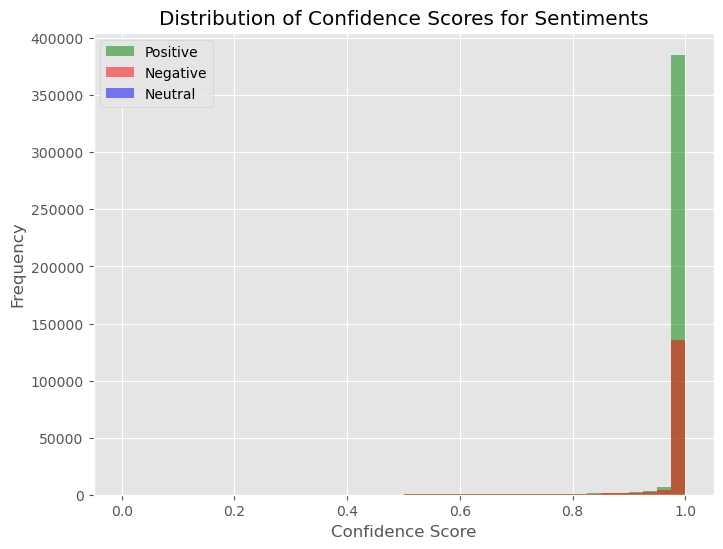

In [54]:
# Extract confidence scores for each sentiment label
positive_confidence = [entry['confidence'] for entry in flair_scores.values() if entry['sentiment'] == 'POSITIVE']
negative_confidence = [entry['confidence'] for entry in flair_scores.values() if entry['sentiment'] == 'NEGATIVE']
neutral_confidence = [entry['confidence'] for entry in flair_scores.values() if entry['sentiment'] == 'NEUTRAL']

# Plotting the histograms for each sentiment
plt.figure(figsize=(8, 6))
plt.hist(positive_confidence, bins=20, alpha=0.5, label='Positive', color='green')
plt.hist(negative_confidence, bins=20, alpha=0.5, label='Negative', color='red')
plt.hist(neutral_confidence, bins=20, alpha=0.5, label='Neutral', color='blue')

plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.title('Distribution of Confidence Scores for Sentiments')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
confidence_list = []

# Iterate through the DataFrame and populate the confidence scores
for index, row in merged_df.iterrows():
    my_id = row['Id']
    # Check if the ID exists in flair_scores dictionary
    if my_id in flair_scores:
        confidence_list.append(flair_scores[my_id]['confidence'])
    else:
        confidence_list.append(None)  # No confidence score available for this ID

# Add the confidence scores as a new column 'Flair' to the DataFrame
merged_df['Flair'] = confidence_list

In [63]:
merged_df.head()

,Id,neg,neu,pos,compound,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,blob,flair,Flair
1,2,0.138,0.862,0.000,-0.5664,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.033333,"{'sentiment': 'POSITIVE', 'confidence': 0.9998...",0.999986
2,3,0.091,0.754,0.155,0.8265,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.133571,"{'sentiment': 'NEGATIVE', 'confidence': 0.9999...",0.999974
3,4,0.000,1.000,0.000,0.0000,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.166667,"{'sentiment': 'POSITIVE', 'confidence': 0.9999...",0.999473
4,5,0.000,0.552,0.448,0.9468,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.483333,"{'sentiment': 'POSITIVE', 'confidence': 0.9994...",0.999710
5,6,0.029,0.809,0.163,0.8830,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,0.257407,"{'sentiment': 'POSITIVE', 'confidence': 0.9997...",0.999846


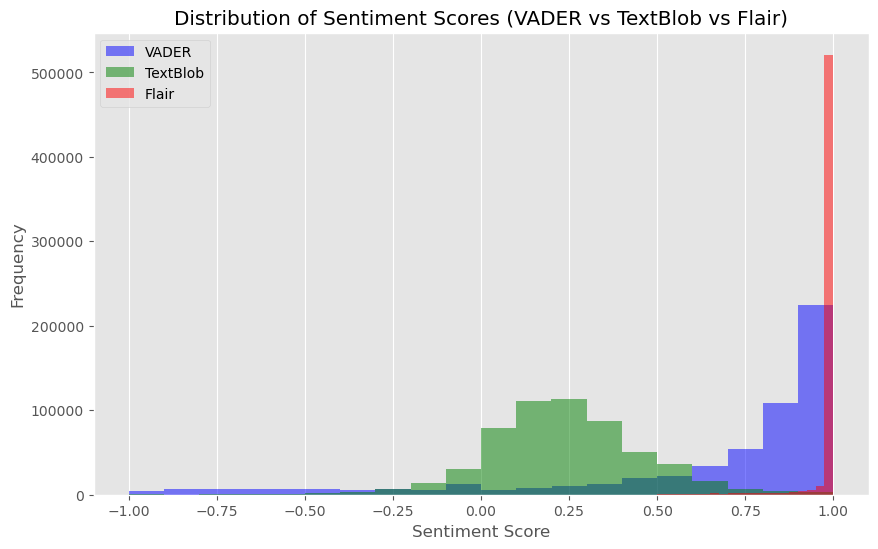

In [65]:
#Histograms for VADER, TextBlob and Flair scores
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(merged_df['compound'], bins=20, alpha=0.5, color='blue', label='VADER')
plt.hist(merged_df['blob'], bins=20, alpha=0.5, color='green', label='TextBlob')
plt.hist(merged_df['Flair'], bins=20, alpha=0.5, color='red', label='Flair')
plt.title('Distribution of Sentiment Scores (VADER vs TextBlob vs Flair)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()

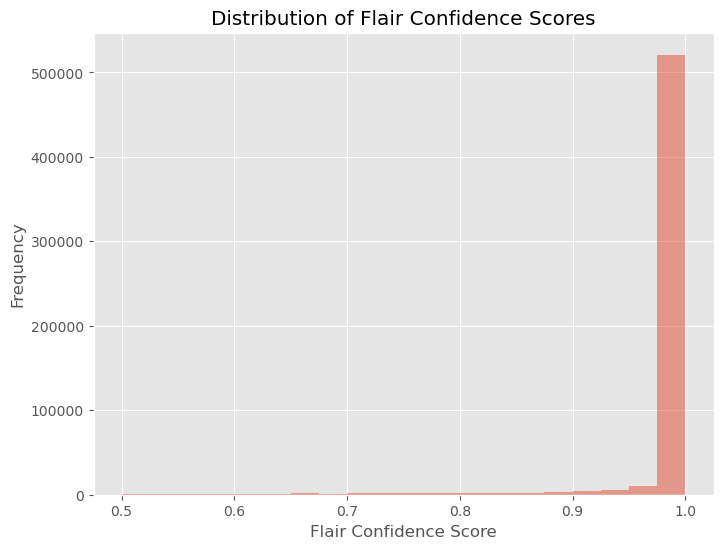

In [66]:
import matplotlib.pyplot as plt

# Assuming you have added the 'Flair' column to your DataFrame as described earlier

# Extract 'Flair' column for plotting
flair_scores = df['Flair']

# Plotting the histogram of Flair scores
plt.figure(figsize=(8, 6))
plt.hist(flair_scores, bins=20, alpha=0.5)
plt.xlabel('Flair Confidence Score')
plt.ylabel('Frequency')
plt.title('Distribution of Flair Confidence Scores')
plt.grid(True)
plt.show()

we can see why flair had vertical bar like plot.

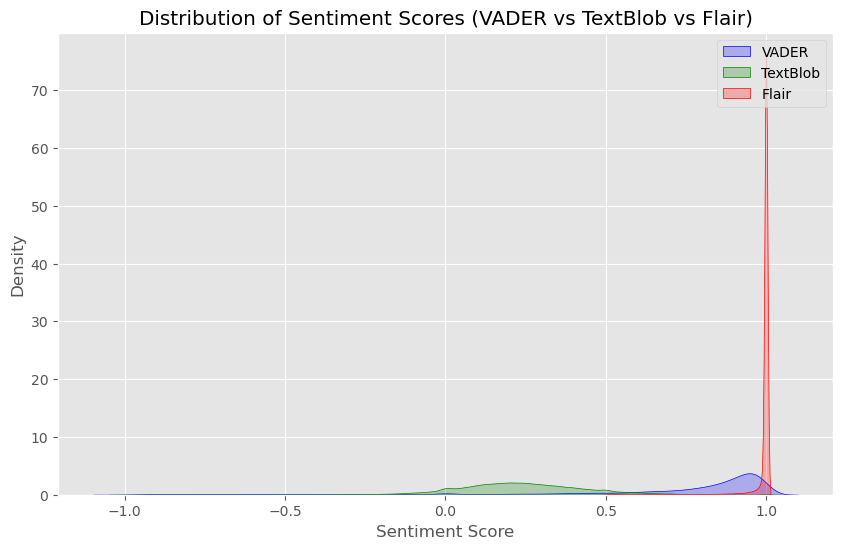

In [69]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# KDE plots for sentiment scores
sns.kdeplot(merged_df['compound'], color='blue', label='VADER', shade=True)
sns.kdeplot(merged_df['blob'], color='green', label='TextBlob', shade=True)
sns.kdeplot(merged_df['Flair'], color='red', label='Flair', shade=True)

plt.title('Distribution of Sentiment Scores (VADER vs TextBlob vs Flair)')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()